In [1]:
library(tidyverse) #Reading data
library(lubridate) #Reading and manipulating dates and times
library(readr) #Reading the CSV data file
library(DBI)
library(RMariaDB)
library(RSQLite)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Load in the data set
games_data = read.csv("games.csv")


In [3]:
#Display the structure of the dataset
glimpse(games_data)

Rows: 1,512
Columns: 14
$ X                 <int> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15…
$ Title             <chr> "Elden Ring", "Hades", "The Legend of Zelda: Breath …
$ Release.Date      <chr> "Feb 25, 2022", "Dec 10, 2019", "Mar 03, 2017", "Sep…
$ Team              <chr> "['Bandai Namco Entertainment', 'FromSoftware']", "[…
$ Rating            <dbl> 4.5, 4.3, 4.4, 4.2, 4.4, 4.3, 4.2, 4.3, 3.0, 4.3, 4.…
$ Times.Listed      <chr> "3.9K", "2.9K", "4.3K", "3.5K", "3K", "2.3K", "1.6K"…
$ Number.of.Reviews <chr> "3.9K", "2.9K", "4.3K", "3.5K", "3K", "2.3K", "1.6K"…
$ Genres            <chr> "['Adventure', 'RPG']", "['Adventure', 'Brawler', 'I…
$ Summary           <chr> "Elden Ring is a fantasy, action and open world game…
$ Reviews           <chr> "[\"The first playthrough of elden ring is one of th…
$ Plays             <chr> "17K", "21K", "30K", "28K", "21K", "33K", "7.2K", "9…
$ Playing           <chr> "3.8K", "3.2K", "2.5K", "679", "2.4K", "1.8K", "1.1K…
$ Backlogs      

In [4]:
#Check for missing values
missing_values = colSums(is.na(games_data))
print(missing_values)

                X             Title      Release.Date              Team 
                0                 0                 0                 0 
           Rating      Times.Listed Number.of.Reviews            Genres 
               13                 0                 0                 0 
          Summary           Reviews             Plays           Playing 
                0                 0                 0                 0 
         Backlogs          Wishlist 
                0                 0 


In [5]:
#check for duplicates
duplicate_rows = games_data[duplicated(games_data) | duplicated(games_data, fromLast = TRUE), ]

#Print duplicates:
print("Duplicate Rows:")
duplicate_rows

[1] "Duplicate Rows:"


X,Title,Release.Date,Team,Rating,Times.Listed,Number.of.Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>


In [6]:
#What are the data types for each column?
print("Original Data Types:")
print(sapply(games_data, class))

[1] "Original Data Types:"
                X             Title      Release.Date              Team 
        "integer"       "character"       "character"       "character" 
           Rating      Times.Listed Number.of.Reviews            Genres 
        "numeric"       "character"       "character"       "character" 
          Summary           Reviews             Plays           Playing 
      "character"       "character"       "character"       "character" 
         Backlogs          Wishlist 
      "character"       "character" 


In [7]:
#Convert data types if needed. This is VERY common for dates and times. Library(lubridate) works well with dates.
#Example: #Convert column to an integer type
games_data$Rating = as.integer(games_data$Rating)

#What are the updated column types?
    print("Updated Data Types:")
    print(sapply(games_data$Rating, class))

[1] "Updated Data Types:"
   [1] "integer" "integer" "integer" "integer" "integer" "integer" "integer"
   [8] "integer" "integer" "integer" "integer" "integer" "integer" "integer"
  [15] "integer" "integer" "integer" "integer" "integer" "integer" "integer"
  [22] "integer" "integer" "integer" "integer" "integer" "integer" "integer"
  [29] "integer" "integer" "integer" "integer" "integer" "integer" "integer"
  [36] "integer" "integer" "integer" "integer" "integer" "integer" "integer"
  [43] "integer" "integer" "integer" "integer" "integer" "integer" "integer"
  [50] "integer" "integer" "integer" "integer" "integer" "integer" "integer"
  [57] "integer" "integer" "integer" "integer" "integer" "integer" "integer"
  [64] "integer" "integer" "integer" "integer" "integer" "integer" "integer"
  [71] "integer" "integer" "integer" "integer" "integer" "integer" "integer"
  [78] "integer" "integer" "integer" "integer" "integer" "integer" "integer"
  [85] "integer" "integer" "integer" "integer" "in

In [8]:
# Shows the column name
column_names = names(games_data)
# Make all column names lowercase:
column_names = tolower(column_names)
# Changes the column names and puts them back into the main data frame
names(games_data) = column_names

# Prints the results
names(games_data)

[1] "x"                 "title"             "release.date"     
 [4] "team"              "rating"            "times.listed"     
 [7] "number.of.reviews" "genres"            "summary"          
[10] "reviews"           "plays"             "playing"          
[13] "backlogs"          "wishlist"

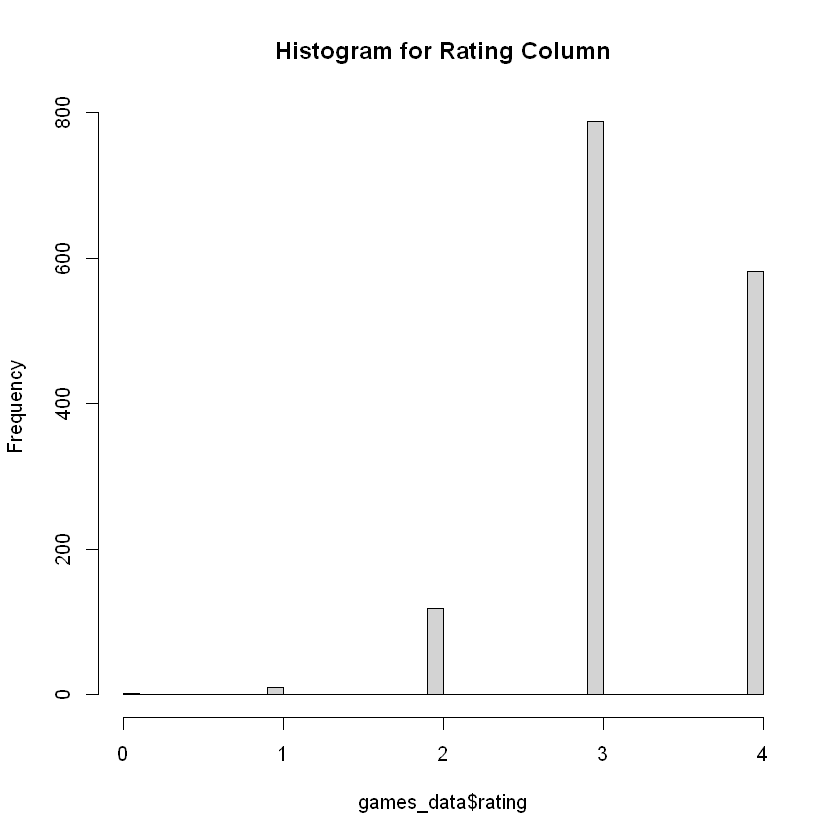

In [9]:
# There is an outlier at the 1 rating, most of the ratings are around the 2 - 4 ratings.
hist(games_data$rating, main = "Histogram for Rating Column", breaks = 30)

In [10]:
# Shows the column name
column_names = names(games_data)
# Replaces all the periods in the name with underscore 
column_names <- gsub("\\.", "_", column_names) 
# Changes the column names and puts them back into the main data frame
names(games_data) = column_names

# creates the game_id column
names(games_data)[1] <- "game_id"

# Prints the results
print(names(games_data))

 [1] "game_id"           "title"             "release_date"     
 [4] "team"              "rating"            "times_listed"     
 [7] "number_of_reviews" "genres"            "summary"          
[10] "reviews"           "plays"             "playing"          
[13] "backlogs"          "wishlist"         


In [11]:
# Change the release date to data format
games_data$release_date = mdy(games_data$release_date)


head(games_data$release_date)

Warning message:
" 3 failed to parse."


[1] "2022-02-25" "2019-12-10" "2017-03-03" "2015-09-15" "2017-02-24"
[6] "2011-11-18"

In [12]:
# Remove the K and add ",000" to the number. 
# Function to perform replacements
replace_function <- function(x) {
    x <- gsub("\\.", "", x)
    x <- gsub("K", "00", x)
return(x)
}

# Columns to apply the replacements
columns_to_modify = c("playing", "plays","wishlist", "backlogs", "times_listed","number_of_reviews")

# Modifies the column
games_data[columns_to_modify] = lapply(games_data[columns_to_modify], replace_function)

# Converts the characters into integers
for (col in columns_to_modify) {
    games_data[[col]] = as.integer(as.character(games_data[[col]]))
}

# View a glimpse of the dataframe
glimpse(games_data)


Rows: 1,512
Columns: 14
$ game_id           <int> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15…
$ title             <chr> "Elden Ring", "Hades", "The Legend of Zelda: Breath …
$ release_date      <date> 2022-02-25, 2019-12-10, 2017-03-03, 2015-09-15, 201…
$ team              <chr> "['Bandai Namco Entertainment', 'FromSoftware']", "[…
$ rating            <int> 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4…
$ times_listed      <int> 3900, 2900, 4300, 3500, 300, 2300, 1600, 2100, 867, …
$ number_of_reviews <int> 3900, 2900, 4300, 3500, 300, 2300, 1600, 2100, 867, …
$ genres            <chr> "['Adventure', 'RPG']", "['Adventure', 'Brawler', 'I…
$ summary           <chr> "Elden Ring is a fantasy, action and open world game…
$ reviews           <chr> "[\"The first playthrough of elden ring is one of th…
$ plays             <int> 1700, 2100, 3000, 2800, 2100, 3300, 7200, 9200, 2500…
$ playing           <int> 3800, 3200, 2500, 679, 2400, 1800, 1100, 759, 470, 1…
$ backlogs      

In [13]:
#Save the newly cleaned dataset as a NEW file:
#write.csv(games_data, 'cleaned_games_data.csv')

In [14]:
# load in the data to build the database
review_data = read.csv('cleaned_games_data.csv')

# need to drop teh first column otherwise you will get an error later
review_data = review_data[,-1]

In [15]:
#Connect to the database you created in Assignment #6 using your preferred method.
db <- dbConnect(dbDriver("SQLite"), dbname = "video_game_reviews.db")

In [16]:
# Creates the first table for the dataset 

first_table = "CREATE TABLE IF NOT EXISTS game (
    game_id  INTEGER AUTO_INCREMENT PRIMARY KEY,
    title TEXT,
    release_date TEXT,
    team TEXT,
    genres TEXT,
    summary TEXT
);"

# Executes the table
dbExecute(db, first_table)

[1] 0

In [17]:
# View if the columns were loaded in correctly 
dbListTables(db)

[1] "game"

In [18]:
# The table that was created
table_name = "game"

# Write a query to show the column names from the created table
query_table_1 = paste0("PRAGMA table_info(", table_name,");")

#Retrieves the column names from the table we created 
db_columns = dbGetQuery(db, query_table_1)$name

#Define teh common columns between the CSV and Database 
common_columns_first_table = intersect(colnames(review_data), db_columns)

#These are teh column tables 
common_columns_first_table

[1] "game_id"      "title"        "release_date" "team"         "genres"      
[6] "summary"

In [19]:
# Creates a subset of teh data using the original csv taking only 
# the specified column names 
game_subset = review_data[, common_columns_first_table]

# Writes the data into the table 
dbWriteTable(db, "game", game_subset, append = TRUE, row.names = FALSE)

In [ ]:
# checks the data in the table
dbReadTable(db, "game")

In [21]:
# Create the table
second_table = "CREATE TABLE IF NOT EXISTS reviews (
    game_id INTEGER,
    rating INTEGER,
    times_listed INTEGER,
    number_of_reviews INTEGER,
    reviews TEXT,
    FOREIGN KEY (game_id) REFERENCES game(game_id) 
);"
# Executes the table
dbExecute(db, second_table)

[1] 0

In [22]:
# View if the columns were loaded in correctly 
dbListTables(db)

[1] "game"    "reviews"

In [23]:
# The table that was created
table_name = "reviews"

# Write a query to show the column names from the created table
query_table_2 = paste0("PRAGMA table_info(", table_name,");")

#Retrieves the column names from the table we created 
db_columns = dbGetQuery(db, query_table_2)$name

#Define teh common columns between the CSV and Database 
common_columns_second_table = intersect(colnames(review_data), db_columns)

#These are teh column tables 
common_columns_second_table

[1] "game_id"           "rating"            "times_listed"     
[4] "number_of_reviews" "reviews"

In [24]:
# Creates a subset of teh data using the original csv taking only 
# the specified column names 
game_subset = review_data[, common_columns_second_table]

# Writes the data into the table 
dbWriteTable(db, "reviews", game_subset, append = TRUE, row.names = FALSE)

In [ ]:
# checks the data in the table
dbReadTable(db, "reviews")

In [26]:
# Create the table
third_table = "CREATE TABLE IF NOT EXISTS user_activity (
    game_id INTEGER,
    plays INTEGER,
    playing INTEGER,
    backlogs INTEGER,
    wishlist INTEGER,
    FOREIGN KEY (game_id) REFERENCES game(game_id) 
);"

# Executes the table
dbExecute(db, third_table)

[1] 0

In [27]:
# View if the columns were loaded in correctly 
dbListTables(db)

[1] "game"          "reviews"       "user_activity"

In [28]:
# The table that was created
table_name = "user_activity"

# Write a query to show the column names from the created table
query_table_3 = paste0("PRAGMA table_info(", table_name,");")

#Retrieves the column names from the table we created 
db_columns = dbGetQuery(db, query_table_3)$name

#Define teh common columns between the CSV and Database 
common_columns_third_table = intersect(colnames(review_data), db_columns)

#These are teh column tables 
common_columns_third_table

[1] "game_id"  "plays"    "playing"  "backlogs" "wishlist"

In [29]:
# Creates a subset of teh data using the original csv taking only 
# the specified column names 
game_subset = review_data[, common_columns_third_table]

# Writes the data into the table 
dbWriteTable(db, "user_activity", game_subset, append = TRUE, row.names = FALSE)

In [ ]:
# checks the data in the table
dbReadTable(db, "user_activity")

In [ ]:
#Complete a quick query to ensure your data is available on the server.
test <- dbGetQuery(db, "SELECT * 
                        FROM game
                        LIMIT 10")
test

**Question:**
<br>
What games had < 2000 plays
<br>
<br>
**What tables are we joining:**
<br>
Games & user_activity

In [32]:
# Creates an inner join query
# Creates teh aliases and new column total plays.
# Turns game into a g as an alias 
# Makes an  inner join on the alias user_activity and game 
# This line 'INNER JOIN user_activity ua ON g.game_id = ua.game_id' links together the game_id in both games and user_activity
# Then filters by less than 2000 and limits to 10
less_than_2k_plays = dbGetQuery(db, "SELECT g.title, SUM(ua.plays) AS total_plays
                            FROM game AS g
                            INNER JOIN user_activity ua ON g.game_id = ua.game_id
                            WHERE ua.plays < 2000
                            GROUP BY g.title
                            Limit 10")
less_than_2k_plays

title,total_plays
<chr>,<int>
100% Orange Juice,1800
428: Shibuya Scramble,676
AI: The Somnium Files - Nirvana Initiative,3000
Advance Wars,1900
Alan Wake Remastered,690
Alpha Protocol,987
Altered Beast,1500
American McGee's Alice,1100
Anonymous;Code,8


**Question:** <br>
What games have a rating of three and how many people have put it on their wish list
<br>
<br>
**What tables are we joining?**<br>
Game, user_activity and reviews

In [33]:
# groups the the title from game table, user_activity table and the reviews table and shows the results of all three tables
games_rated_3 = dbGetQuery(db, "SELECT g.title AS game_title, ua.wishlist, r.rating
                            FROM game g
                            INNER JOIN reviews r ON g.game_id = r.game_id
                            LEFT JOIN user_activity ua ON g.game_id = ua.game_id
                            WHERE r.rating = 3
                            LIMIT 10")
games_rated_3 

game_title,wishlist,rating
<chr>,<int>,<int>
Among Us,126,3
Stray,3400,3
Pokémon Legends: Arceus,2100,3
Grand Theft Auto V,664,3
Cyberpunk 2077,2900,3
Resident Evil Village,2800,3
Shin Megami Tensei V,2600,3
Bayonetta,2300,3
The Elder Scrolls V: Skyrim,100,3


**Research Question:** <br>
What genres have currently playing of > 5000
<br>
<br>
**What tables are we joining?** <br>
game & user_activity

In [34]:
# Since Genres repeats throughout the data set I need to take the sum of plays and assign them to the proper genre
current_playing_more_5k = dbGetQuery(db, "SELECT g.genres, SUM(ua.plays) AS Currently_Playing
                            FROM game AS g
                            RIGHT JOIN user_activity ua ON g.game_id = ua.game_id
                            GROUP BY g.genres
                            HAVING SUM(ua.plays) > 5000
                            LIMIT 10")
current_playing_more_5k 

genres,Currently_Playing
<chr>,<int>
"['Adventure', 'Arcade', 'Indie', 'Music', 'Platform']",5100
"['Adventure', 'Arcade', 'Indie', 'Platform', 'Strategy']",27900
"['Adventure', 'Arcade', 'Indie', 'RPG', 'Shooter']",18600
"['Adventure', 'Arcade', 'Indie', 'Shooter']",17800
"['Adventure', 'Brawler', 'Indie', 'Platform', 'RPG']",8400
"['Adventure', 'Brawler', 'Indie', 'RPG']",19949
"['Adventure', 'Brawler', 'Platform', 'RPG', 'Shooter']",8800
"['Adventure', 'Brawler', 'Platform']",48200
"['Adventure', 'Brawler', 'Puzzle']",5600


**Research Question:** <br>
What games have a number of reviews < 2500
<br>
<br>
**What tables are we joining?**<br>
 game & reviews

In [35]:
# Combines the title and the number of reviews 
current_play_less_2500 = dbGetQuery(db, "SELECT g.title, r.number_of_reviews AS Number_of_Reviews
                            FROM game AS g
                            LEFT JOIN reviews r ON g.game_id = r.game_id
                            WHERE r.number_of_reviews < 2500
                            GROUP BY g.title
                            LIMIT 10")
current_play_less_2500

title,Number_of_Reviews
<chr>,<int>
100% Orange Juice,112
13 Sentinels: Aegis Rim,1200
428: Shibuya Scramble,249
A Hat in Time,898
A Plague Tale: Innocence,852
A Short Hike,1100
A Way Out,620
AI: The Somnium Files - Nirvana Initiative,455
Abzu,714


**Question:**<br>
 what genres have a high rating level (>= 3) vs a low rating (< 3)
<br>
<br>
**What tables are we joining?:** <br>
games and reviews 

In [36]:
#CASE statement with Left Join and removes NA values

high_low_rating = dbGetQuery(db, "SELECT g.genres, r.rating,
                                -- if else statement to classify each rating
                                CASE 
                                    WHEN r.rating < 3 THEN 'LOW'
                                    ELSE 'HIGH'
                                END AS Rating_level 
                            FROM game AS g
                            Left JOIN reviews AS r ON g.game_id = r.game_id

                            -- There were NA values found in the data 
                            WHERE r.rating IS NOT NULL
                            GROUP BY g.genres

                            -- you can change from ASC to DESC or comment out to  see a random sample to check if the code workked 
                            ORDER BY r.rating DESC
                            LIMIT 10
")
high_low_rating 

genres,rating,Rating_level
<chr>,<int>,<chr>
['Shooter'],4,HIGH
['RPG'],4,HIGH
"['RPG', 'Turn Based Strategy']",4,HIGH
"['RPG', 'Strategy']",4,HIGH
"['RPG', 'Strategy', 'Turn Based Strategy']",4,HIGH
"['RPG', 'Strategy', 'Tactical', 'Turn Based Strategy']",4,HIGH
"['RPG', 'Simulator', 'Visual Novel']",4,HIGH
"['RPG', 'Simulator', 'Strategy', 'Tactical']",4,HIGH
"['RPG', 'Shooter']",4,HIGH


**Question:** <br> 
what games are highly wanted (>= 3000), wanted (>= 2000) and not really wanted (< 2000)
<br>
<br>
**What tables are we joining?:** <br>
games and user activity 

In [37]:
# Case with a Left Join 
desire_level = dbGetQuery(db, "SELECT g.title, ua.wishlist,
                                -- gives a rating based on three different criterias
                                CASE 
                                    WHEN ua.wishlist >= 3000 THEN 'Highly Wanted'
                                    When ua.wishlist >= 2000 THEN 'Wanted'
                                    ELSE 'Not Wanted'
                                END AS Level_of_Interest

                            FROM game AS g
                            LEFT JOIN user_activity AS ua ON g.game_id = ua.game_id
                            GROUP BY g.title

                            -- you can change the order to see a random sample to check if the code workked 
                            ORDER BY ua.wishlist DESC
                            LIMIT 10
")

desire_level

title,wishlist,Level_of_Interest
<chr>,<int>,<chr>
The Legend of Zelda: Tears of the Kingdom,5400,Highly Wanted
Elden Ring,4800,Highly Wanted
Omori,3800,Highly Wanted
NieR Replicant ver.1.22474487139...,3700,Highly Wanted
NieR: Automata,3600,Highly Wanted
Hades,3600,Highly Wanted
Stray,3400,Highly Wanted
Sekiro: Shadows Die Twice,3400,Highly Wanted
Metroid Dread,3300,Highly Wanted


**Question:**<br>
What teams created succesful games
<br>
<br>
**What tables are we joining?:** <br>
game, review and user_activity

In [38]:
# Judges the success of the game from the people currently playing and the number of reviews they recieve
successful_teams = dbGetQuery(db, "SELECT g.team, ua.plays, r.number_of_reviews,
                                CASE 
                                    WHEN ua.plays > 2000 AND r.number_of_reviews > 1000 THEN 'Successful'
                                    When ua.plays >= 500 AND r.number_of_reviews >= 500 THEN 'Average'
                                    ELSE 'Dead on Arrival'
                                END AS Games_Success

                            FROM game AS g
                            INNER JOIN user_activity AS ua ON g.game_id = ua.game_id
                            LEFT JOIN reviews AS r ON g.game_id = r.game_id

                            -- Screen for NULL values 
                            WHERE r.number_of_reviews IS NOT NULL AND ua.plays IS NOT NULL

                            GROUP BY g.team

                            -- you can change the order to see a random sample to check if the code workked 
                            ORDER BY ua.wishlist DESC
                            LIMIT 10
")

successful_teams

team,plays,number_of_reviews,Games_Success
<chr>,<int>,<int>,<chr>
"['Bandai Namco Entertainment', 'FromSoftware']",1700,3900,Average
"['OMOCAT', 'PLAYISM']",7200,1600,Successful
"['Toylogic', 'Square Enix']",6700,1500,Successful
['Supergiant Games'],2100,2900,Successful
"['PlatinumGames', 'Square Enix']",1800,2900,Average
"['FromSoftware', 'Activision']",1400,2300,Average
"['BlueTwelve Studio', 'Annapurna Interactive']",7700,1500,Successful
"['Nintendo', 'MercurySteam']",9200,2100,Successful
"['FromSoftware', 'Sony Computer Entertainment']",1700,3400,Average


**Question:** <br>
What is the average plays by team
<br>
<br>
**What tables are we joining?:** <br>
plays and teams

In [39]:
#Write a query to find the average of a numerical column.      
teams_avg_plays = dbGetQuery(db, "SELECT g.team, AVG(ua.plays) AS Average_plays
                            FROM game AS g
                            INNER JOIN user_activity AS ua ON g.game_id = ua.game_id
                            -- Screen for NULL values 
                            WHERE ua.plays IS NOT NULL
                            GROUP BY g.team
                            -- Control the Avg plays 
                            ORDER BY ua.plays DESC
                            LIMIT 10
")

teams_avg_plays


team,Average_plays
<chr>,<dbl>
['Capcom'],3410.771
"['Ubisoft Montpellier', 'Ubisoft Entertainment']",8000.000
"['Nintendo', 'HAL Laboratory']",6125.000
"['Sega', 'Ryū Ga Gotoku Studios']",6160.000
"['EA Redwood Shores', 'Electronic Arts']",9600.000
"['BioWare', 'Electronic Arts']",9600.000
"['505 Games', 'Remedy Entertainment']",9600.000
['The Behemoth'],9400.000
"['Sony Interactive Entertainment', 'Kojima Productions']",9400.000


**Question:** <br>
that are the min and max plays by each rating and what are the amount of players that have wish listed the game
<br>
<br>
**What table(s) are we adding a record to?** <br>
game, reviews, and user_activity

In [40]:
# What is the MIN and Max of total plays for each game by rating
min_max_waitlist = dbGetQuery(db, "
SELECT g.title, MIN(ua.plays) AS total_plays, r.rating,
CASE 
    WHEN ua.wishlist >= 2000 THEN 'Large amount of players waiting to play'
    Else'Low amount of players waiting to play'
END Amount_of_players_wishlisted

FROM game AS g
-- Performs a join for both tables
INNER JOIN user_activity AS ua ON g.game_id = ua.game_id
LEFT JOIN reviews AS r ON g.game_id = r.game_id

-- Screen for NULL values 
WHERE r.rating IS NOT  NULL
GROUP BY r.rating

UNION ALL

SELECT g.title, MAX(ua.plays), r.rating,
CASE 
    WHEN ua.wishlist >= 2000 THEN 'Large amount of players waiting to play'
    Else'Low amount of players waiting to play'
END Amount_of_players_wishlisted

FROM game AS g
-- Performs a join for both tables
INNER JOIN user_activity AS ua ON g.game_id = ua.game_id
LEFT JOIN reviews AS r ON g.game_id = r.game_id

-- Screen for NULL values 
WHERE r.rating IS NOT  NULL
GROUP BY r.rating
ORDER BY r.rating
")

min_max_waitlist

title,total_plays,rating,Amount_of_players_wishlisted
<chr>,<int>,<int>,<chr>
Superman: The New Superman Adventures,859,0,Low amount of players waiting to play
Superman: The New Superman Adventures,859,0,Low amount of players waiting to play
Garten of Banban 2,55,1,Low amount of players waiting to play
Devil May Cry 2,6400,1,Low amount of players waiting to play
Phantom Brigade,16,2,Low amount of players waiting to play
Pokémon Sword,9700,2,Low amount of players waiting to play
Megami Ibunroku Persona,16,3,Low amount of players waiting to play
Resident Evil Village,9900,3,Large amount of players waiting to play
Elden Ring: Shadow of the Erdtree,1,4,Low amount of players waiting to play


In [42]:
#Close the database connection :)
dbDisconnect(db)